In [1]:
import cv2
#import requests

import glob
import numpy as np
import os
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
import matplotlib.pyplot as plt

#import random
#import torch

In [12]:
import sys
print(sys.executable)

d:\Studying\GraduationThesis\venv\Scripts\python.exe


In [15]:

#Defind 2 URL of video for dataset
# List các video
#Video ngay 1
video_drunk_path = "D:\\Studying\\GraduationThesis\\data\\videos\\Drunk\\Day1"
video_undrunk_path = "D:\\Studying\\GraduationThesis\\data\\videos\\UnDrunk\\Day1"

#Video ngay 2
video_drunk_path_2 = "D:\\Studying\\GraduationThesis\\data\\videos\\Drunk\\Day2"
video_undrunk_path_2 = "D:\\Studying\\GraduationThesis\\data\\videos\\UnDrunk\\Day2"

#Video ngay 3
video_drunk_path_3 = "D:\\Studying\\GraduationThesis\\data\\videos\\Drunk\\Day3"
video_undrunk_path_3 = "D:\\Studying\\GraduationThesis\\data\\videos\\UnDrunk\\Day3"
#Video ngay 4
video_drunk_path_4 = "D:\\Studying\\GraduationThesis\\data\\videos\\Drunk\\Day4"
video_undrunk_path_4 = "D:\\Studying\\GraduationThesis\\data\\videos\\UnDrunk\\Day4"

#Video ngay 5
video_drunk_path_5 = "D:\\Studying\\GraduationThesis\\data\\videos\\Drunk\\Day5"
video_undrunk_path_5 = "D:\\Studying\\GraduationThesis\\data\\videos\\UnDrunk\\Day5"

# Đường dẫn tới thư mục chứa hình ảnh "drunk" và "undrunk" 1
images_drunk = "D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day1"
images_undrunk = "D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day1"

# Đường dẫn tới thư mục chứa hình ảnh "drunk" và "undrunk" ngày 2
images_drunk_2 = "D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day2"
images_undrunk_2 = "D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day2"

# Đường dẫn tới thư mục chứa hình ảnh "drunk" và "undrunk" ngày 3
images_drunk_3 = "D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day3"
images_undrunk_3 = "D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day3"

# Đường dẫn tới thư mục chứa hình ảnh "drunk" và "undrunk" ngày 4
images_drunk_4 = "D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day4"
images_undrunk_4 = "D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day4"

# Đường dẫn tới thư mục chứa hình ảnh "drunk" và "undrunk" ngày 5
images_drunk_5 = "D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day5"
images_undrunk_5 = "D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day5"

# Đường dẫn tới thư mục chứa tất cả hình ảnh "drunk" và "undrunk"
train_undrunk = "D:\\Studying\\GraduationThesis\\data\\train_data\\undrunk"
train_drunk = "D:\\Studying\\GraduationThesis\\data\\train_data\\drunk"
test_undrunk= "D:\\Studying\\GraduationThesis\\data\\test_data\\undrunk"
test_drunk= "D:\\Studying\\GraduationThesis\\data\\test_data\\drunk"

# Đường dẫn tới thư mục train và test
train_path = "D:\\Studying\\GraduationThesis\\data\\train_data"
test_path = "D:\\Studying\\GraduationThesis\\data\\test_data"



In [8]:
def convert_video_to_images(video_path, images_path, video_name):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Không thể mở video: {video_path}")
        return

    os.makedirs(images_path, exist_ok=True)

    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration_seconds = frame_count / fps

    frame_number = 0
    current_second = 0
    count = 1  

    while cap.isOpened() and current_second <= duration_seconds:
        ret, frame = cap.read()
        if ret:
            current_second = frame_number / fps        
            frame_number += 1
            # Lưu một frame từ video mỗi giây
            if frame_number % fps == 0:
                frame_filename = os.path.join(images_path, f'{video_name}_{count}.jpg')
                cv2.imwrite(frame_filename, frame)
                count += 1  # Tăng count lên 1 sau khi lưu hình ảnh
            
        else:
            break

    cap.release()
    cv2.destroyAllWindows()
            





In [9]:

# def for_videos_to_images(videos_directory, images_directory):
#     # Liệt kê tất cả các tệp trong thư mục video
#     for root, dirs, files in os.walk(videos_directory):
#         for file in files:
#             # Kiểm tra xem tệp có phải là video không
#             if file.lower().endswith(('.avi', '.mp4', '.mov', '.flv', '.wmv')):
#                 video_path = os.path.join(root, file)
#                 try : 
#                     convert_video_to_images(video_path, images_directory,1)
#                 except Exception  as e:
#                     print(f"Lỗi khi xử lý video {video_path}: {e}")
def for_videos_to_images(videos_directory, images_directory):
    # Liệt kê tất cả các tệp trong thư mục video
    for root, dirs, files in os.walk(videos_directory):
        for file in files:
            # Kiểm tra xem tệp có phải là video không
            if file.lower().endswith(('.avi', '.mp4', '.mov', '.flv', '.wmv')):
                video_path = os.path.join(root, file)
                video_name = os.path.splitext(file)[0]  # Tên video (không bao gồm phần mở rộng)
                #images_directory_for_video = os.path.join(images_directory, video_name)  # Thư mục lưu trữ hình ảnh cho video tương ứng
                #os.makedirs(images_directory_for_video, exist_ok=True)  # Tạo thư mục lưu trữ hình ảnh nếu chưa tồn tại
                try:
                    convert_video_to_images(video_path, images_directory, video_name)
                except Exception as e:
                    print(f"Lỗi khi xử lý video {video_path}: {e}")



In [69]:
# Chuyển đổi từng video undrunk trong danh sách
# Chuyển video sang hình ảnh ngày 1
for_videos_to_images(video_drunk_path,images_drunk)
for_videos_to_images(video_undrunk_path,images_undrunk)

print("Chuyển đổi hoàn thành!")

Chuyển đổi hoàn thành!


In [7]:
# Chuyển video sang hình ảnh ngày 2
for_videos_to_images(video_drunk_path_2,images_drunk_2)
for_videos_to_images(video_undrunk_path_2,images_undrunk_2)

print("Chuyển đổi hoàn thành!")

Chuyển đổi hoàn thành!


In [8]:
# Chuyển video sang hình ảnh ngày 3
for_videos_to_images(video_drunk_path_3,images_drunk_3)
for_videos_to_images(video_undrunk_path_3,images_undrunk_3)

print("Chuyển đổi hoàn thành!")

Chuyển đổi hoàn thành!


In [9]:
# Chuyển video sang hình ảnh ngày 4
for_videos_to_images(video_drunk_path_4,images_drunk_4)
for_videos_to_images(video_undrunk_path_4,images_undrunk_4)

print("Chuyển đổi hoàn thành!")

Chuyển đổi hoàn thành!


In [14]:
# Chuyển video sang hình ảnh ngày 5
for_videos_to_images(video_drunk_path_5,images_drunk_5)
for_videos_to_images(video_undrunk_path_5,images_undrunk_5)

print("Chuyển đổi hoàn thành!")

Lỗi khi xử lý video D:\Studying\GraduationThesis\data\videos\Drunk\Day5\PIR-206_76.mov: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'

Lỗi khi xử lý video D:\Studying\GraduationThesis\data\videos\Drunk\Day5\PIR-206_77.mov: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'

Lỗi khi xử lý video D:\Studying\GraduationThesis\data\videos\Drunk\Day5\PIR-206_78.mov: OpenCV(4.10.0) D:\

In [15]:
import os
import shutil
from sklearn.model_selection import train_test_split

In [16]:




# Tách dữ liệu thành tập train và tập test
train_drunk_data, test_drunk_data = train_test_split(os.listdir(images_drunk), test_size=0.2, random_state=42)
train_undrunk_data, test_undrunk_data = train_test_split(os.listdir(images_undrunk), test_size=0.2, random_state=42)

# Tạo các thư mục cần thiết nếu chưa tồn tại
#for directory in ["train_drunk", "train_undrunk", "test_drunk", "test_undrunk"]:
#    os.makedirs(os.path.join(train_path, directory), exist_ok=True)
#    os.makedirs(os.path.join(test_path, directory), exist_ok=True)

# Di chuyển các hình ảnh vào các thư mục tương ứng
for image in train_drunk_data:
    shutil.copy(os.path.join(images_drunk, image), os.path.join(train_path, "drunk", image))

for image in test_drunk_data:
    shutil.copy(os.path.join(images_drunk, image), os.path.join(test_path, "drunk", image))

for image in train_undrunk_data:
    shutil.copy(os.path.join(images_undrunk, image), os.path.join(train_path, "undrunk", image))

for image in test_undrunk_data:
    shutil.copy(os.path.join(images_undrunk, image), os.path.join(test_path, "undrunk", image))

print("Tách dữ liệu thành công!")


Tách dữ liệu thành công!


In [13]:
# Tách dữ liệu thành tập train và tập test ngày 2
train_drunk_data, test_drunk_data = train_test_split(os.listdir(images_drunk_2), test_size=0.2, random_state=42)
train_undrunk_data, test_undrunk_data = train_test_split(os.listdir(images_undrunk_2), test_size=0.2, random_state=42)

# Tạo các thư mục cần thiết nếu chưa tồn tại
#for directory in ["train_drunk", "train_undrunk", "test_drunk", "test_undrunk"]:
#    os.makedirs(os.path.join(train_path, directory), exist_ok=True)
#    os.makedirs(os.path.join(test_path, directory), exist_ok=True)

# Di chuyển các hình ảnh vào các thư mục tương ứng
for image in train_drunk_data:
    shutil.copy(os.path.join(images_drunk_2, image), os.path.join(train_path, "drunk", image))

for image in test_drunk_data:
    shutil.copy(os.path.join(images_drunk_2, image), os.path.join(test_path, "drunk", image))

for image in train_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_2, image), os.path.join(train_path, "undrunk", image))

for image in test_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_2, image), os.path.join(test_path, "undrunk", image))

print("Tách dữ liệu thành công!")

Tách dữ liệu thành công!


In [14]:
# Tách dữ liệu thành tập train và tập test ngày 3
train_drunk_data, test_drunk_data = train_test_split(os.listdir(images_drunk_3), test_size=0.2, random_state=42)
train_undrunk_data, test_undrunk_data = train_test_split(os.listdir(images_undrunk_3), test_size=0.2, random_state=42)

# Tạo các thư mục cần thiết nếu chưa tồn tại
#for directory in ["train_drunk", "train_undrunk", "test_drunk", "test_undrunk"]:
#    os.makedirs(os.path.join(train_path, directory), exist_ok=True)
#    os.makedirs(os.path.join(test_path, directory), exist_ok=True)

# Di chuyển các hình ảnh vào các thư mục tương ứng
for image in train_drunk_data:
    shutil.copy(os.path.join(images_drunk_3, image), os.path.join(train_path, "drunk", image))

for image in test_drunk_data:
    shutil.copy(os.path.join(images_drunk_3, image), os.path.join(test_path, "drunk", image))

for image in train_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_3, image), os.path.join(train_path, "undrunk", image))

for image in test_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_3, image), os.path.join(test_path, "undrunk", image))

print("Tách dữ liệu thành công!")

Tách dữ liệu thành công!


In [15]:
# Tách dữ liệu thành tập train và tập test ngày 4
train_drunk_data, test_drunk_data = train_test_split(os.listdir(images_drunk_4), test_size=0.2, random_state=42)
train_undrunk_data, test_undrunk_data = train_test_split(os.listdir(images_undrunk_4), test_size=0.2, random_state=42)

# Tạo các thư mục cần thiết nếu chưa tồn tại
#for directory in ["train_drunk", "train_undrunk", "test_drunk", "test_undrunk"]:
#    os.makedirs(os.path.join(train_path, directory), exist_ok=True)
#    os.makedirs(os.path.join(test_path, directory), exist_ok=True)

# Di chuyển các hình ảnh vào các thư mục tương ứng
for image in train_drunk_data:
    shutil.copy(os.path.join(images_drunk_4, image), os.path.join(train_path, "drunk", image))

for image in test_drunk_data:
    shutil.copy(os.path.join(images_drunk_4, image), os.path.join(test_path, "drunk", image))

for image in train_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_4, image), os.path.join(train_path, "undrunk", image))

for image in test_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_4, image), os.path.join(test_path, "undrunk", image))

print("Tách dữ liệu thành công!")

Tách dữ liệu thành công!


In [17]:
# Tách dữ liệu thành tập train và tập test ngày 5
train_drunk_data, test_drunk_data = train_test_split(os.listdir(images_drunk_5), test_size=0.2, random_state=42)
train_undrunk_data, test_undrunk_data = train_test_split(os.listdir(images_undrunk_5), test_size=0.2, random_state=42)

# Tạo các thư mục cần thiết nếu chưa tồn tại
#for directory in ["train_drunk", "train_undrunk", "test_drunk", "test_undrunk"]:
#    os.makedirs(os.path.join(train_path, directory), exist_ok=True)
#    os.makedirs(os.path.join(test_path, directory), exist_ok=True)

# Di chuyển các hình ảnh vào các thư mục tương ứng
for image in train_drunk_data:
    shutil.copy(os.path.join(images_drunk_5, image), os.path.join(train_path, "drunk", image))

for image in test_drunk_data:
    shutil.copy(os.path.join(images_drunk_5, image), os.path.join(test_path, "drunk", image))

for image in train_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_5, image), os.path.join(train_path, "undrunk", image))

for image in test_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_5, image), os.path.join(test_path, "undrunk", image))

print("Tách dữ liệu thành công!")

Tách dữ liệu thành công!


In [11]:
image_size = 224

In [18]:
images_name = []
def train_data():
    train_data_undunk = [] 
    train_data_drunk=[]

    for image1 in tqdm(os.listdir(train_drunk)): 
        path = os.path.join(train_drunk, image1)
        #img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)   
        images_name.append(image1)      
        img1 = cv2.imread(path)
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_drunk.append(img1) 
    for image2 in tqdm(os.listdir(train_undrunk)): 
        path = os.path.join(train_undrunk, image2)
        images_name.append(image2)
        img2 = cv2.imread(path)
        #img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_undunk.append(img2) 
    train_data= np.concatenate((np.asarray(train_data_drunk),np.asarray(train_data_undunk)),axis=0)
    return train_data

In [12]:

train_data = train_data()

100%|██████████| 69/69 [00:00<00:00, 116.16it/s]


In [13]:
def test_data():
    test_data_drunk = [] 
    test_data_undrunk=[]
    for image1 in tqdm(os.listdir(test_drunk)): 
        path = os.path.join(test_drunk, image1)
        images_name.append(image1)    
        #img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)        
        img1 = cv2.imread(path)     
        img1 = cv2.resize(img1, (image_size, image_size))  
        test_data_drunk.append(img1) 
    for image2 in tqdm(os.listdir(test_undrunk)): 
        images_name.append(image2)    
        path = os.path.join(test_undrunk, image2)
        #img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)       
        img2 = cv2.imread(path)   
        img2 = cv2.resize(img2, (image_size, image_size))    
        test_data_undrunk.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_drunk),np.asarray(test_data_undrunk)),axis=0) 
    return test_data 

In [14]:
test_data  = test_data() 

100%|██████████| 18/18 [00:00<00:00, 125.87it/s]


In [15]:
# Kết hợp train_data và test_data thành một mảng x_data
x_data=np.concatenate((train_data,test_data),axis=0)
# Chuẩn hóa dữ liệu trong mảng x_data để giữ cho các giá trị nằm trong khoảng từ 0 đến 1
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [16]:
# Tạo mảng chứa 96 phần tử 0 và 96 phần tử 1 cho Y_train
z1 = np.zeros(69)
o1 = np.ones(100)
Y_train = np.concatenate((o1, z1), axis=0)

# Tạo mảng chứa 10 phần tử 0 và 10 phần tử 1 cho Y_test
z = np.zeros(18)
o = np.ones(25)
Y_test = np.concatenate((o, z), axis=0)

In [17]:

# Tạo mảng y_data bằng cách kết hợp Y_train và Y_test, sau đó thay đổi hình dạng
y_data = np.concatenate((Y_train, Y_test), axis=0).reshape(x_data.shape[0], 1)


In [18]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (212, 128, 128, 3)
Y shape:  (212, 1)


In [19]:
from sklearn.model_selection import train_test_split

# Sử dụng train_test_split để chia dữ liệu thành tập train và tập test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Số lượng mẫu trong tập train và tập test
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

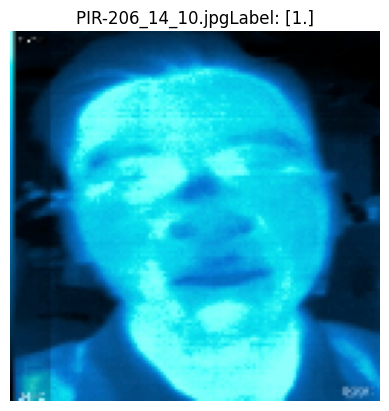

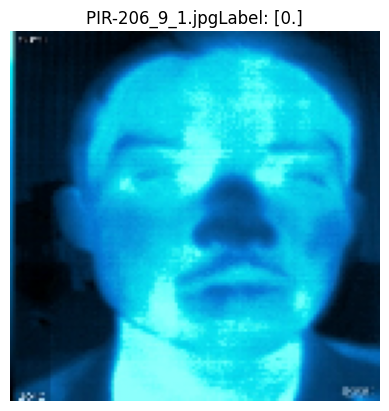

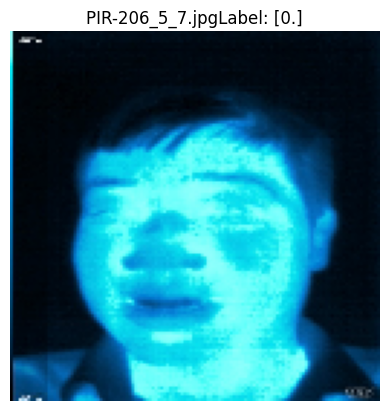

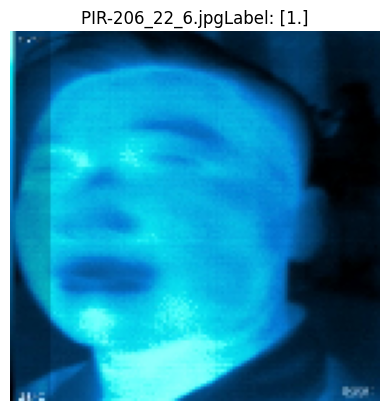

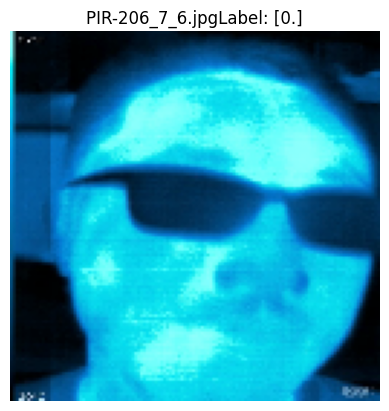

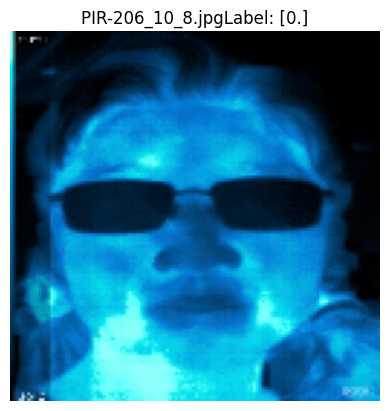

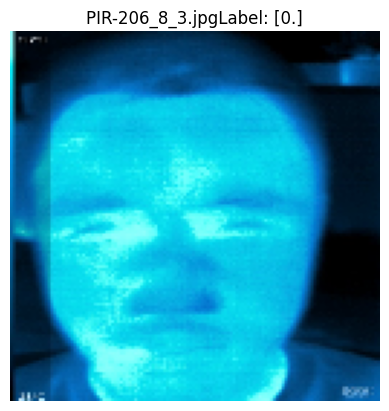

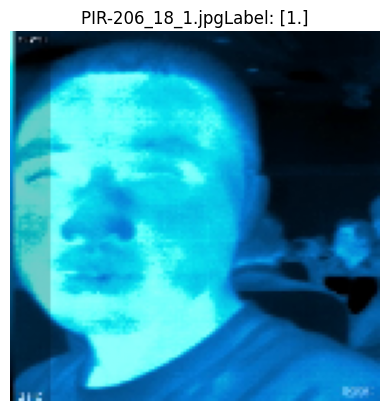

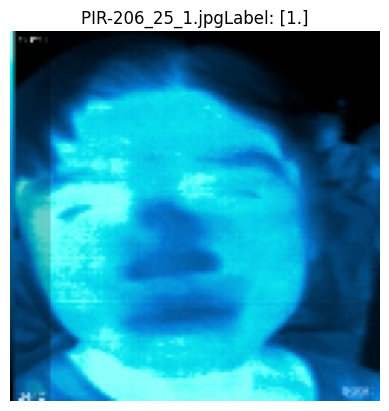

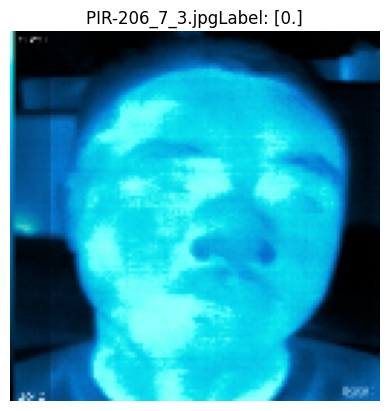

In [20]:

import numpy as np

# Tạo danh sách chứa tên của các hình ảnh
#image_names = [os.path.basename(image_path) for image_path in image_paths]
# Chọn và hiển thị 10 hình ảnh ngẫu nhiên từ tập dữ liệu
for _ in range(10):
    index = np.random.randint(0, x_data.shape[0])  # Chọn một chỉ số ngẫu nhiên từ 0 đến số lượng hình ảnh - 1
    random_image = x_data[index]  # Lấy hình ảnh tương ứng với chỉ số ngẫu nhiên
    name = images_name[index]
    # In hình ảnh ra màn hình
    plt.imshow(random_image)
    plt.title(name + 'Label: ' + str(y_data[index]))  # In nhãn của hình ảnh
    plt.axis('off')  # Ẩn các trục
    plt.show()


In [21]:
# Chuyển đổi mỗi mảng hình ảnh trong x_train và x_test từ dạng ba chiều sang dạng một chiều
#Mô hình Logistic Regression thường mong đợi đầu vào ở dạng một vector, 
#do đó việc chuyển đổi từ mảng 3 chiều sang mảng 1 chiều là bước cần thiết để đưa dữ liệu vào mô hình này.
x_train_flatten = x_train.reshape(number_of_train, x_train.shape[1] * x_train.shape[2] * x_train.shape[3])
x_test_flatten = x_test.reshape(number_of_test, x_test.shape[1] * x_test.shape[2] * x_test.shape[3])

# In hình dạng của các mảng đã chuyển đổi
print("X train flatten:", x_train_flatten.shape)
print("X test flatten:", x_test_flatten.shape)


X train flatten: (169, 49152)
X test flatten: (43, 49152)


In [22]:
# Chuyển vị các mảng x_train_flatten, x_test_flatten, y_train, và y_test
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_train = y_train.T
y_test = y_test.T

# In hình dạng của các mảng sau khi chuyển vị
print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)


x train:  (49152, 169)
x test:  (49152, 43)
y train:  (1, 169)
y test:  (1, 43)


In [55]:
import matplotlib.pyplot as plt
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion):
        
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

def predict(w,b,x_test):
    
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    #Xác định số chiều của dữ liệu đầu vào bằng cách lấy kích thước của chiều đầu tiên của x_train.
    dimension =  x_train.shape[0]
    # Khởi tạo trọng số và bias ban đầu bằng cách sử dụng hàm initialize_weights_and_bias với số chiều của dữ liệu.
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    print("Test Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,2)))
    print("Train Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2)))

C:\Users\Admin\AppData\Local\Temp\ipykernel_21864\2156312011.py:15: RuntimeWarning: divide by zero encountered in log
  loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
C:\Users\Admin\AppData\Local\Temp\ipykernel_21864\2156312011.py:15: RuntimeWarning: invalid value encountered in multiply
  loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)


Cost after iteration 0: nan
Cost after iteration 100: nan
Cost after iteration 200: 0.036571
Cost after iteration 300: 0.011518
Cost after iteration 400: 0.007079
Cost after iteration 500: 0.005412
Cost after iteration 600: 0.004527
Cost after iteration 700: 0.003962
Cost after iteration 800: 0.003560
Cost after iteration 900: 0.003256
Cost after iteration 1000: 0.003015
Cost after iteration 1100: 0.002818
Cost after iteration 1200: 0.002653
Cost after iteration 1300: 0.002513
Cost after iteration 1400: 0.002391
Cost after iteration 1500: 0.002285
Cost after iteration 1600: 0.002190
Cost after iteration 1700: 0.002106
Cost after iteration 1800: 0.002029
Cost after iteration 1900: 0.001959


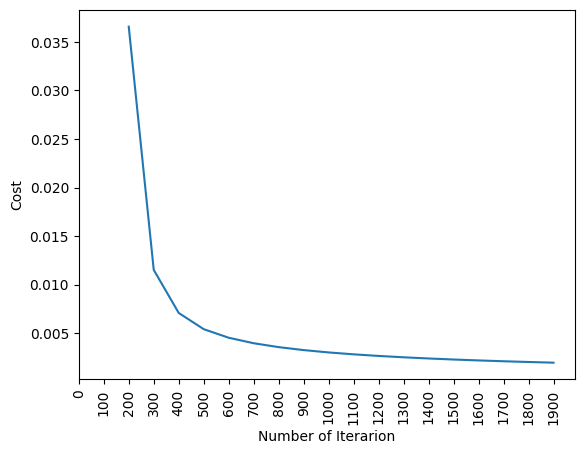

Test Accuracy: 95.35 %
Train Accuracy: 100.0 %


In [62]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.008, num_iterations = 2000)

In [23]:
# Hyperparameter Tunning: GridSearcCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l1", "l2"]}
logistic_regression = LogisticRegression(random_state=42)
log_reg_cv = GridSearchCV(logistic_regression, grid, cv=10)
log_reg_cv.fit(x_train.T, y_train.T)


d:\Studying\GraduationThesis\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Studying\GraduationThesis\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Studying\GraduationThesis\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Studying\GraduationThesis\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [24]:
print("best hyperparameters: ", log_reg_cv.best_params_)
print("accuracy: ", log_reg_cv.best_score_)

best hyperparameters:  {'C': 1.0, 'penalty': 'l2'}
accuracy:  0.9705882352941178


In [25]:
log_reg= LogisticRegression(C=1,penalty="l2")
log_reg.fit(x_train.T,y_train.T)
print("test accuracy: {} ".format(log_reg.fit(x_test.T, y_test.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(log_reg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

d:\Studying\GraduationThesis\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Studying\GraduationThesis\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test accuracy: 1.0 


d:\Studying\GraduationThesis\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train accuracy: 1.0 


In [94]:
def preprocess_image(image):
    # Resize hình ảnh về kích thước phù hợp với đầu vào của mô hình
    resized_image = cv2.resize(image, (image_size, image_size))  # Thay width và height bằng kích thước đầu vào mong muốn
    # Làm phẳng hình ảnh thành một mảng một chiều
    image_reshape = resized_image.flatten()
    # Reshape đầu ra thành một vector cột
    image_reshape = image_reshape.reshape(-1, 1)
    print(image_reshape.shape)
    return image_reshape.T

# Tiền xử lý hình ảnh mới
#path = "D:\\Studying\\GraduationThesis\\data\\test_data\\test_drunk\\PIR-206_16_9.jpg"
#path = "D:\\Studying\\GraduationThesis\\data\\test_data\\test_undrunk\\PIR-206_10_4.jpg" 
#path = "D:\\Studying\\GraduationThesis\\test\\drunk\\test_drunk_2.jpg"     
#path = "D:\\Studying\\GraduationThesis\\test\\undrunk\\test_undrunk_8.jpg"     
path = "D:\\Studying\\GraduationThesis\\test\\undrunk\\2\\test_undrunk_4.jpg" 

img = cv2.imread(path)     
new_image = preprocess_image(img)
# Dự đoán nhãn của một hình ảnh từ đường dẫn
predicted_proba  = log_reg_cv.predict_proba(new_image)
predicted_label = log_reg_cv.predict(new_image)

# Hiển thị phần trăm của từng lớp
classes = log_reg_cv.classes_ 
for i, class_name in enumerate(classes):
    print(f"Probability of class '{class_name}': {predicted_proba [0][i] * 100:.2f}%")
print("Predicted label:", predicted_label)


(49152, 1)
Probability of class '0.0': 0.00%
Probability of class '1.0': 100.00%
Predicted label: [1.]


In [95]:
test_path_drunk = "D:\\Studying\\GraduationThesis\\data\\videos\\Drunk\\Day2\\PIR-206_38.mov"
test_path_undrunk = "D:\\Studying\\GraduationThesis\\data\\videos\\UnDrunk\\Day2\\PIR-206_33.mov"
path_save_drunk = "D:\\Studying\\GraduationThesis\\test\\drunk\\2"
path_save_undrunk = "D:\\Studying\\GraduationThesis\\test\\undrunk\\4"



In [32]:
# Test drunk
convert_video_to_images(test_path_drunk,path_save_drunk,"test_drunk")

In [96]:
#Test undrunk
convert_video_to_images(test_path_undrunk,path_save_undrunk,"test_undrunk")

In [77]:
def predict_proba_all_images(directory_path):
    image_paths = [os.path.join(directory_path, image) for image in os.listdir(directory_path)]
    for image_path in image_paths:
        img = cv2.imread(image_path)
        img = cv2.resize(img, (image_size, image_size))
        # Làm phẳng hình ảnh thành một mảng một chiều
        img = img.flatten()
        # Reshape đầu ra thành một vector cột
        img = img.reshape(-1, 1)        
        print(image_path)
        # Dự đoán xác suất thuộc mỗi lớp
        predicted_label = log_reg_cv.predict(img.T)
        print("Predicted label:", predicted_label)

In [97]:
predict_proba_all_images(path_save_undrunk)

D:\Studying\GraduationThesis\test\undrunk\4\test_undrunk_1.jpg
Predicted label: [0.]
D:\Studying\GraduationThesis\test\undrunk\4\test_undrunk_2.jpg
Predicted label: [0.]
D:\Studying\GraduationThesis\test\undrunk\4\test_undrunk_3.jpg
Predicted label: [0.]
D:\Studying\GraduationThesis\test\undrunk\4\test_undrunk_4.jpg
Predicted label: [0.]
D:\Studying\GraduationThesis\test\undrunk\4\test_undrunk_5.jpg
Predicted label: [0.]
D:\Studying\GraduationThesis\test\undrunk\4\test_undrunk_6.jpg
Predicted label: [0.]
D:\Studying\GraduationThesis\test\undrunk\4\test_undrunk_7.jpg
Predicted label: [0.]
D:\Studying\GraduationThesis\test\undrunk\4\test_undrunk_8.jpg
Predicted label: [0.]


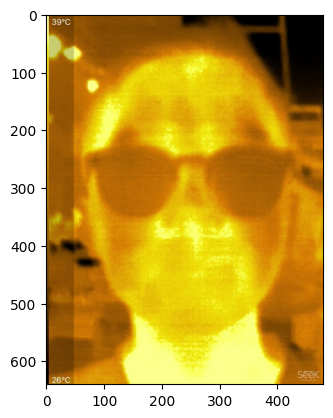

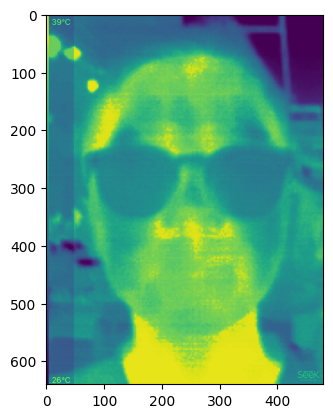

Temperature Histogram: [1.99511722e-02 3.84440110e-03 1.75781245e-03 2.01171869e-03
 1.40299473e-03 1.19140628e-03 1.18815107e-03 1.72851561e-03
 1.77734380e-03 1.31184899e-03 1.13932288e-03 8.23567680e-04
 1.16536464e-03 4.75260429e-04 5.89192729e-04 6.99869765e-04
 5.69661439e-04 1.13606767e-03 8.49609380e-04 6.64062507e-04
 5.53385413e-04 6.67317712e-04 6.83593738e-04 7.09635438e-04
 7.42187491e-04 7.03125028e-04 5.24088566e-04 3.77604156e-04
 4.32942703e-04 4.06901032e-04 4.45963553e-04 5.11067687e-04
 4.32942703e-04 4.88281250e-04 4.10156237e-04 3.93880211e-04
 5.79427055e-04 5.07812481e-04 5.72916644e-04 5.24088566e-04
 5.85937523e-04 4.75260429e-04 4.81770840e-04 5.40364592e-04
 5.56640618e-04 7.68229191e-04 6.93359354e-04 6.64062507e-04
 6.86848944e-04 6.11979165e-04 7.25911465e-04 7.71484396e-04
 7.71484396e-04 6.47786481e-04 6.44531276e-04 5.76171849e-04
 5.76171849e-04 6.44531276e-04 6.38020807e-04 6.47786481e-04
 7.61718722e-04 6.70572917e-04 4.68749990e-04 7.22656259e-04
 

In [6]:
import cv2
import numpy as np

def calculate_temperature_histogram(image):
    # Chuyển đổi không gian màu từ BGR sang RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()
    # Chuyển đổi ảnh sang không gian màu nhiệt độ
    temperature_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
     # In hình ảnh ra màn hình
    plt.imshow(temperature_image)
    plt.show()
    # Tính toán histogram của các mức sáng nhiệt độ
    hist = cv2.calcHist([temperature_image], [0], None, [256], [0, 256])
    
    # Chuẩn hóa histogram
    hist /= np.sum(hist)
    
    return hist.flatten()

# Load ảnh
image_path = "D:\\Studying\\GraduationThesis\\test\\undrunk\\2\\test_undrunk_4.jpg"
image = cv2.imread(image_path)

# Tính toán histogram của các mức sáng nhiệt độ trên ảnh
temperature_hist = calculate_temperature_histogram(image)

# In histogram
print("Temperature Histogram:", temperature_hist)

In [6]:


# Đường dẫn đến pre-trained Haar Cascade Classifier
cascade_path = "path_to_haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(cascade_path)

# Đường dẫn đến hình ảnh
image_path = "path_to_your_image.jpg"

# Đọc ảnh
image = cv2.imread(image_path)

# Chuyển ảnh sang đen trắng để tăng cường tốc độ xử lý
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Sử dụng Haar Cascade Classifier để nhận diện khuôn mặt
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Lặp qua các khuôn mặt được nhận diện và cắt chúng ra khỏi ảnh
for (x, y, w, h) in faces:
    face = image[y:y+h, x:x+w]
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.imwrite("face.jpg", face)  # Lưu khuôn mặt ra file

# Hiển thị ảnh với khuôn mặt đã được cắt ra
cv2.imshow("Detected Faces", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


Mô hình CNN

In [16]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow
import matplotlib.pyplot as plt
from IPython.display import HTML

# import setuptools.dist
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow
# import matplotlib.pyplot as plt
# from IPython.display import HTML

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 224

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="binary"
)

Found 534 images belonging to 2 classes.


In [18]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  ...
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]]

 [[0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  ...
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]]

 [[0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  ...
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]]

 ...

 [[1.5438297e-01 8.1314951e-02 7.4393498e-03]
  [1.5375197e-01 8.0052949e-02 9.3323449e-03]
  [1.5312096e-01 7.8790955e-02 1.1225341e-02]
  ..

In [20]:
class_names = list(train_generator.class_indices.keys())
class_names

['drunk', 'undrunk']

In [21]:
# Định nghĩa bộ tạo dữ liệu hình ảnh với việc thay đổi tỷ lệ và tăng cường dữ liệu
test_datagen = ImageDataGenerator(
    rescale=1./255,       # Thay đổi tỷ lệ giá trị pixel từ [0, 255] thành [0, 1]
    rotation_range=10,    # Xoay ngẫu nhiên các hình ảnh trong khoảng 10 độ
    horizontal_flip=True  # Lật ngang ngẫu nhiên các hình ảnh
)

# Tạo một bộ tạo dữ liệu tải hình ảnh từ thư mục được chỉ định
test_generator = test_datagen.flow_from_directory(
    test_path,                 # Đường dẫn đến thư mục chứa hình ảnh
    target_size=(IMAGE_SIZE, IMAGE_SIZE),  # Thay đổi kích thước hình ảnh thành (IMAGE_SIZE, IMAGE_SIZE)
    class_mode="binary"        # Trả lại nhãn dưới dạng số nguyên
)

Found 138 images belonging to 2 classes.


In [22]:
class_names = list(test_generator.class_indices.keys())
class_names

['drunk', 'undrunk']

In [46]:
for image_batch, label_batch in test_generator:
    print(image_batch[0][0])
    print(label_batch)
    break


[[9.79887784e-01 9.95574057e-01 3.89130294e-01]
 [9.80915010e-01 9.96601284e-01 3.95293862e-01]
 [9.81942356e-01 9.97628629e-01 4.01457429e-01]
 [9.82969582e-01 9.98655856e-01 4.07620996e-01]
 [9.83996809e-01 9.99683082e-01 4.13784534e-01]
 [9.85024095e-01 1.00000000e+00 4.20303285e-01]
 [9.86051381e-01 1.00000000e+00 4.26980466e-01]
 [9.87078607e-01 1.00000000e+00 4.33657676e-01]
 [9.88105834e-01 1.00000000e+00 4.40334857e-01]
 [9.89133120e-01 1.00000000e+00 4.47012097e-01]
 [9.90160406e-01 1.00000000e+00 4.53689277e-01]
 [9.91187632e-01 1.00000000e+00 4.60366458e-01]
 [9.92156923e-01 9.99971032e-01 4.66869682e-01]
 [9.92156923e-01 9.99457419e-01 4.70465094e-01]
 [9.91480410e-01 9.97341394e-01 4.78867710e-01]
 [8.67586315e-01 8.69937956e-01 4.37239349e-01]
 [3.53900284e-01 3.56194377e-01 1.89100772e-01]
 [0.00000000e+00 3.09702381e-03 1.33932270e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.56980735e-04 0.00000000e+00]
 [3.99214514e-05 3.19837034e-03 0.000000

: 

In [23]:
sz = 224

# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu')) #dụng 32 bộ lọc tích chập kích thước 3x3 lên ảnh đầu vào. Dạng đầu vào được chỉ định là (224, 224, 3), trong đó 3 đại diện cho các kênh màu RGB.
model.add(MaxPooling2D(pool_size=(2, 2)))#Lớp này giảm kích thước không gian (chiều cao và chiều rộng) của đầu vào bằng cách sử dụng gộp tối đa với kích thước 2x2.
# Second convolution layer and pooling
model.add(Convolution2D(64, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten()) #: Lớp này trải phẳng đầu ra 3D của các lớp tích chập thành một vector 1D.

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu')) # Một lớp kết nối đầy đủ với 96 đơn vị và hàm kích hoạt ReLU.
model.add(Dropout(0.40)) #Dropout được áp dụng để giảm hiện tượng overfitting. 40% số neuron sẽ được thiết lập ngẫu nhiên về 0 trong quá trình huấn luyện.
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax')) # softmax for more than 2

d:\Studying\GraduationThesis\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
# Sử dụng model do ChatGPT đề xuất
sz = 224
# Khởi tạo mô hình CNN
model = Sequential()

# Lớp tích chập và gộp đầu tiên
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Lớp tích chập và gộp thứ hai
model.add(Convolution2D(64, (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Lớp tích chập và gộp thứ ba
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))


# Trải phẳng các lớp
model.add(Flatten())

# Thêm lớp kết nối đầy đủ
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=7, activation='softmax')) # sử dụng softmax cho hơn 2 lớp

# Compile mô hình
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])






In [25]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,911,751 (91.22 MB)

 Trainable params: 23,911,751 (91.22 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [28]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=15
)

Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 710ms/step - accuracy: 0.8265 - loss: 0.4774 - val_accuracy: 0.8261 - val_loss: 0.3482
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 672ms/step - accuracy: 0.8225 - loss: 0.4094 - val_accuracy: 0.8406 - val_loss: 0.3406
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 688ms/step - accuracy: 0.8582 - loss: 0.3856 - val_accuracy: 0.8261 - val_loss: 0.4168
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 665ms/step - accuracy: 0.8225 - loss: 0.4264 - val_accuracy: 0.8986 - val_loss: 0.2833
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 683ms/step - accuracy: 0.8640 - loss: 0.3217 - val_accuracy: 0.8406 - val_loss: 0.3006
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 671ms/step - accuracy: 0.8680 - loss: 0.3575 - val_accuracy: 0.8986 - val_loss: 0.2671
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 662ms/step - accuracy: 0.8941 - loss: 0.2902 - val_accuracy: 0.8406 - val_loss: 0.3820
Epoch 8/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 677ms/step - accuracy: 0.8609 - loss: 0.2812 - val_accu

In [27]:
# Tạo callback để dừng sớm khi mô hình không cải thiện nữa
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Tạo callback để lưu lại mô hình tốt nhất dưới dạng SavedModel
#model_checkpoint = ModelCheckpoint('model/model5.keras', monitor='val_loss', save_best_only=True, verbose=1)

# Huấn luyện mô hình với các callback
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50, # hoặc số lượng epoch lớn hơn
    #callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/50


d:\Studying\GraduationThesis\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.4082 - loss: 3.1606 - val_accuracy: 0.5435 - val_loss: 0.7391
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 672ms/step - accuracy: 0.4896 - loss: 1.0763 - val_accuracy: 0.6739 - val_loss: 0.7450
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 669ms/step - accuracy: 0.5147 - loss: 0.9194 - val_accuracy: 0.6594 - val_loss: 0.6987
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 667ms/step - accuracy: 0.6241 - loss: 0.8460 - val_accuracy: 0.7391 - val_loss: 0.5408
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 673ms/step - accuracy: 0.6548 - loss: 0.7076 - val_accuracy: 0.8043 - val_loss: 0.4487
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 676ms/step - accuracy: 0.7280 - loss: 0.6403 - val_accuracy: 0.8116 - val_loss: 0.4558
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 642ms/step - accuracy: 0.7469 - loss: 0.5864 - val_accuracy: 0.8261 - val_loss: 0.4130
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 634ms/step - accuracy: 0.7900 - loss: 0.5510 - val_accuracy: 0.7899 -

KeyboardInterrupt: 

In [33]:
# Đánh giá hiệu suất của mô hình trên tập dữ liệu kiểm tra
scores = model.evaluate(test_generator)
scores = model.evaluate(train_generator)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 293ms/step - accuracy: 0.9179 - loss: 0.2665
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 356ms/step - accuracy: 0.9811 - loss: 0.0823


In [37]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Đánh giá mô hình trên tập dữ liệu kiểm tra
scores = model.evaluate(test_generator)
print("Loss: ", scores[0])
print("Accuracy: ", scores[1])

# Dự đoán trên tập dữ liệu kiểm tra
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob)

# Lấy nhãn thực tế từ generator
y_true = test_generator.classes

# Tính toán Precision, Recall và F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 320ms/step - accuracy: 0.9383 - loss: 0.2192
Loss:  0.23092196881771088
Accuracy:  0.9347826242446899
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 294ms/step


InvalidParameterError: The 'y_pred' parameter of precision_score must be an array-like or a sparse matrix. Got 918 instead.

In [20]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report

def evaluate_generator(model, data_generator):
    y_true = data_generator.classes  # Nhãn thực tế
    print(y_true)
    y_pred_prob = model.predict(data_generator)  # Dự đoán xác suất
    print(y_pred_prob)
    y_pred = np.argmax(y_pred_prob, axis=1)  # Chuyển đổi xác suất thành nhãn dự đoán
    #print(y_pred)

    # Tính toán Precision, Recall và F1-score
    report = classification_report(y_true, y_pred, target_names=data_generator.class_indices)
    
    return report

# Đánh giá trên tập test
test_report = evaluate_generator(model, test_generator)
print("\nTest Classification Report:")
print(test_report)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 299ms/step
[[5.94276190e-02 9.40313578e-01 6.90553998e-06 3.69399131e-05
  5.98565530e-05 1.51243614e-04 3.87125237e-06]
 [9.99332607e-01 6.67360262e-04 8.27999995e-13 9.47519515e-13
  3.74788200e-13 5.59910784e-10 4.03757485e-13]
 [9.96605158e-01 3.39484494e-03 1.80062132e-10 9.99013303e-11
  6.74569983e-11 2.70081877e-08 1.24123012e-11]
 [8.62003416e-02 9.13670897e-01 4.95987069e-06 4.43799945e-05
  2.84585349e-05 5.01083050e-05 9.26340817e-07]
 [5.92428565e-01 4.06908393e-01 1.97576846e-05 1.26108489e-05
  5.63337053e-05 5.65888826e-04 8.41465953e-06]
 [2.35881293e-04 9.99762118e-01 1.34327227e-09 1.49132595e-09
  1.31582567e-07 1.88775937e-06 3.38435474e-10]
 [9.55620646e-01 4.4

In [21]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [32]:
type(history.history['loss'])

list

In [33]:
len(history.history['loss'])

30

In [34]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.056876301765442,
 0.6894682049751282,
 0.6107179522514343,
 0.5352487564086914,
 0.4974765181541443]

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

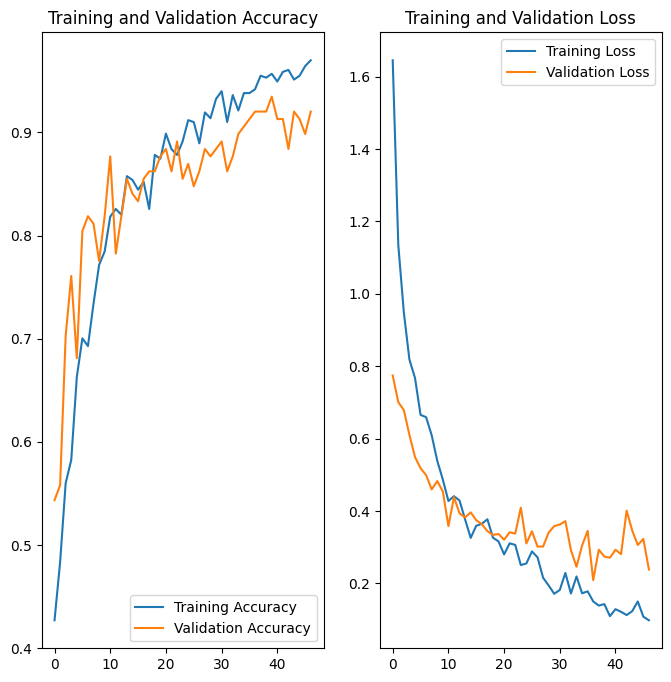

In [26]:
import matplotlib.pyplot as plt
EPOCHS = 47

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
# Tải lại mô hình đã lưu
loaded_model = tf.keras.models.load_model('model/model5.keras')  # hoặc 'model/my_model.keras'

# Kiểm tra mô hình đã tải lại
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,735,255 (273.65 MB)

 Trainable params: 23,911,751 (91.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,823,504 (182.43 MB)

In [29]:
def predict(model, image):
    img_array = tf.keras.preprocessing.image.img_to_array(image)
    #Điều này biến mảng từ dạng (height, width, channels) thành (1, height, width, channels)
    img_array = tf.expand_dims(img_array, 0)
    print(img_array)
    predictions = model.predict(img_array)
    print(predictions)
    print(np.argmax(predictions[0]))
    predicted_class = class_names[np.argmax(predictions[0])]
    print(predicted_class)
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

tf.Tensor(
[[[[9.9328566e-01 1.0000000e+00 5.0754648e-01]
   [9.9290699e-01 1.0000000e+00 5.0830382e-01]
   [9.9252826e-01 1.0000000e+00 5.0906116e-01]
   ...
   [1.8515758e-02 2.8294832e-03 0.0000000e+00]
   [1.9607844e-02 3.9215689e-03 0.0000000e+00]
   [2.5193505e-02 9.5072314e-03 5.5856626e-03]]

  [[9.9718893e-01 9.9888963e-01 5.0085038e-01]
   [9.9681020e-01 9.9926835e-01 5.0122911e-01]
   [9.9643153e-01 9.9964702e-01 5.0160778e-01]
   ...
   [1.8894436e-02 3.2081616e-03 0.0000000e+00]
   [1.9607844e-02 3.9215689e-03 0.0000000e+00]
   [2.5950864e-02 1.0264588e-02 6.3430192e-03]]

  [[9.9563175e-01 9.9498636e-01 4.8821047e-01]
   [9.9714643e-01 9.9536508e-01 4.9161857e-01]
   [9.9866110e-01 9.9574375e-01 4.9502668e-01]
   ...
   [1.9273115e-02 3.5868399e-03 0.0000000e+00]
   [1.9607844e-02 3.9215689e-03 0.0000000e+00]
   [2.6708221e-02 1.1021945e-02 7.1003758e-03]]

  ...

  [[2.8268021e-01 1.9607845e-01 7.4276177e-04]
   [3.6360878e-01 1.9854982e-01 8.5492479e-03]
   [3.9115271e-

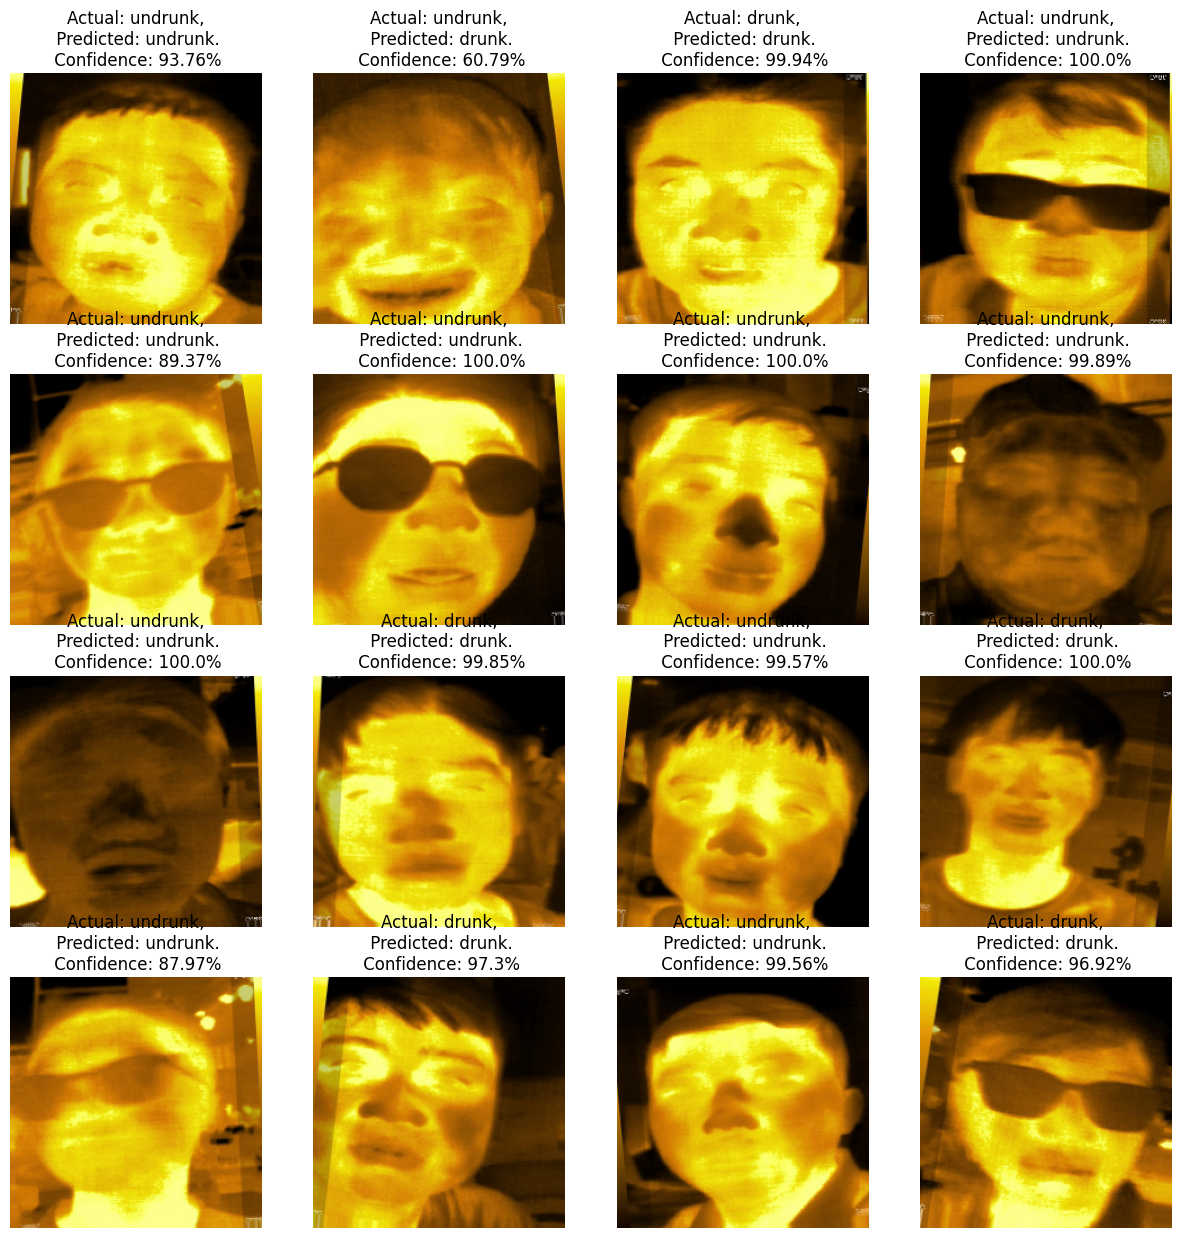

In [40]:
plt.figure(figsize=(15, 15))
for images, labels in train_generator:
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [39]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.export('models/model3')

INFO:tensorflow:Assets written to: models/model3\assets


INFO:tensorflow:Assets written to: models/model3\assets


Saved artifact at 'models/model3'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  1568833658256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1568833659408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1568833658064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1568833660176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1568833661136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1568833662288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1568833656720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1568833662864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1568833660944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1568833664016: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [64]:
# Tạo một TFLite Converter từ mô hình đã huấn luyện
converter = tf.lite.TFLiteConverter.from_saved_model('models/model')
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Chuyển đổi mô hình thành định dạng TensorFlow Lite
tflite_converted_model = converter.convert()

# Lưu mô hình TensorFlow Lite vào một tệp .tflite
with open('trained_model.tflite', 'wb') as f:
    f.write(tflite_converted_model)

In [127]:
print(tf.version.VERSION)
print(model.save_spec() is None)

2.16.1


AttributeError: 'Sequential' object has no attribute 'save_spec'

In [55]:
import numpy as np
import tensorflow as tf


# Tạo một mô hình Sequential
trained_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1]),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

# Biên dịch mô hình với hàm mất mát và trình tối ưu
trained_model.compile(optimizer='sgd', loss='mean_squared_error') 

# Dữ liệu đầu vào và đầu ra
x_train = np.array([-1, 0, 1], dtype=np.float32)
y_train = np.array([-3, -1, 1], dtype=np.float32)

# Huấn luyện mô hình
trained_model.fit(x=x_train, y=y_train, epochs=5)

trained_model.export('models/model')

# Tạo một TFLite Converter từ mô hình đã huấn luyện
converter = tf.lite.TFLiteConverter.from_saved_model('models/model')
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Chuyển đổi mô hình thành định dạng TensorFlow Lite
tflite_converted_model = converter.convert()

# Lưu mô hình TensorFlow Lite vào một tệp .tflite
with open('trained_model.tflite', 'wb') as f:
    f.write(tflite_converted_model)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - loss: 3.2120
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.9897
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.7620
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.5467
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3420
INFO:tensorflow:Assets written to: models/model\assets


INFO:tensorflow:Assets written to: models/model\assets


Saved artifact at 'models/model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_387')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2623005083408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623005083024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623005084368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623005084944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623005084752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623005085712: TensorSpec(shape=(), dtype=tf.resource, name=None)


d:\Studying\GraduationThesis\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Unrecognized data type: x=[-1, 0, 1] (of type <class 'list'>)

In [13]:
model.save('models/tfjs_model/model.h5')

In [2]:
import tensorflowjs as tfjs
import tensorflow as tf
import numpy as np 
np.int = int    
tfjs.converters.save_keras_model('models/tfjs_model/model.h5', 'models/tfjs_model')


d:\Studying\GraduationThesis\venv\Lib\site-packages\tensorflowjs\read_weights.py:28: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.uint8, np.uint16, np.object, np.bool]


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [3]:
# Python

import tensorflowjs as tfjs

tfjs_target_dir = "models/tfjs_model"
tfjs.converters.save_keras_model(model, tfjs_target_dir)

d:\Studying\GraduationThesis\venv\Lib\site-packages\tensorflowjs\read_weights.py:28: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.uint8, np.uint16, np.object, np.bool]


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow

sz = 224
model = Sequential()

# Lớp tích chập và gộp đầu tiên
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu', name = "conv1"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),name='pool1'))

# Lớp tích chập và gộp thứ hai
model.add(Convolution2D(64, (3, 3), activation='relu'),name = "conv2")
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2) , name='pool2'))

# Lớp tích chập và gộp thứ ba
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))


# Trải phẳng các lớp
model.add(Flatten(name='flatten'))

# Thêm lớp kết nối đầy đủ
model.add(Dense(units=128, activation='relu', name='dense1'))
model.add(Dropout(0.4))
model.add(Dense(units=32, activation='relu', name='dense2'))
model.add(Dropout(0.4))
model.add(Dense(units=7, activation='softmax')) # sử dụng softmax cho hơn 2 lớp


# Compile mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# In ra cấu trúc của mô hình
model.summary()


d:\Studying\GraduationThesis\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


TypeError: Sequential.add() got an unexpected keyword argument 'name'

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Xây dựng mô hình CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), name='conv1'),
    MaxPooling2D((2, 2), name='pool1'),
    Conv2D(64, (3, 3), activation='relu', name='conv2'),
    MaxPooling2D((2, 2), name='pool2'),
    Flatten(name='flatten'),
    Dense(128, activation='relu', name='dense1'),
    Dropout(0.4, name='dropout1'),
    Dense(32, activation='relu', name='dense2'),
    Dropout(0.4, name='dropout2'),
    Dense(7, activation='sigmoid', name='output')
])

# Compile mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# In ra cấu trúc của mô hình
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,396,679 (28.22 MB)

 Trainable params: 7,396,679 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

# Chọn lớp bạn muốn trích xuất đặc trưng
layer_names = ['conv2d_3', 'max_pooling2d_2', 'conv2d_4', 'max_pooling2d_3']

# Tạo một mô hình con
outputs = [model.get_layer(name).output for name in layer_names]
feature_model = Model(inputs=model.input, outputs=outputs)


ValueError: The layer sequential_7 has never been called and thus has no defined input.

In [43]:
# Chọn lớp bạn muốn trích xuất đặc trưng
layer_names = ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_2']
# Tải và tiền xử lý một hình ảnh mẫu
image_path = 'D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day1\\PIR-206_14_7.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image, channels=3)
image = tf.image.resize(image, [224, 224])
image = tf.expand_dims(image, axis=0)  # Thêm batch dimension
image = tf.image.convert_image_dtype(image, dtype=tf.float32)

# Trích xuất đặc trưng
features = loaded_model.predict(image)

# Hiển thị đặc trưng của từng lớp
for layer_name, feature_map in zip(layer_names, features):
    print(f"Layer: {layer_name}")
    print(f"Shape: {feature_map.shape}")
    print(f"Shape: {feature_map}")

    # Hiển thị các feature map
    if len(feature_map.shape) == 3:  # Nếu feature map là 4D (batch_size, height, width, channels)
        num_features = feature_map.shape[-1]  # Số lượng feature maps
        size = feature_map.shape[1]  # Chiều cao và chiều rộng của feature map

        # Chuyển đổi feature map về dạng 2D
        display_grid = np.zeros((size, size * num_features))

        for i in range(num_features):
            feature = feature_map[0, :, :, i]
            feature -= feature.mean()
            feature /= feature.std()
            feature *= 64
            feature += 128
            feature = np.clip(feature, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = feature

        scale = 20. / num_features
        plt.figure(figsize=(scale * num_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.show()


IndentationError: unexpected indent (1163273095.py, line 22)

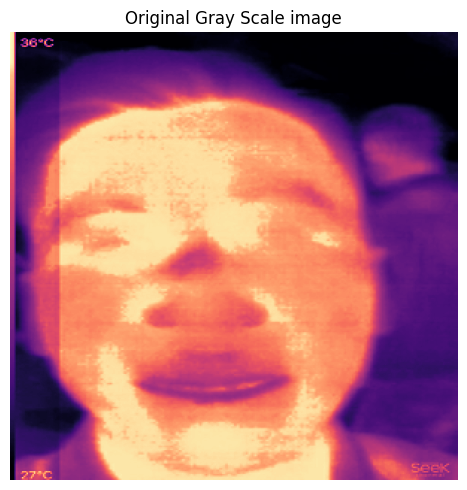

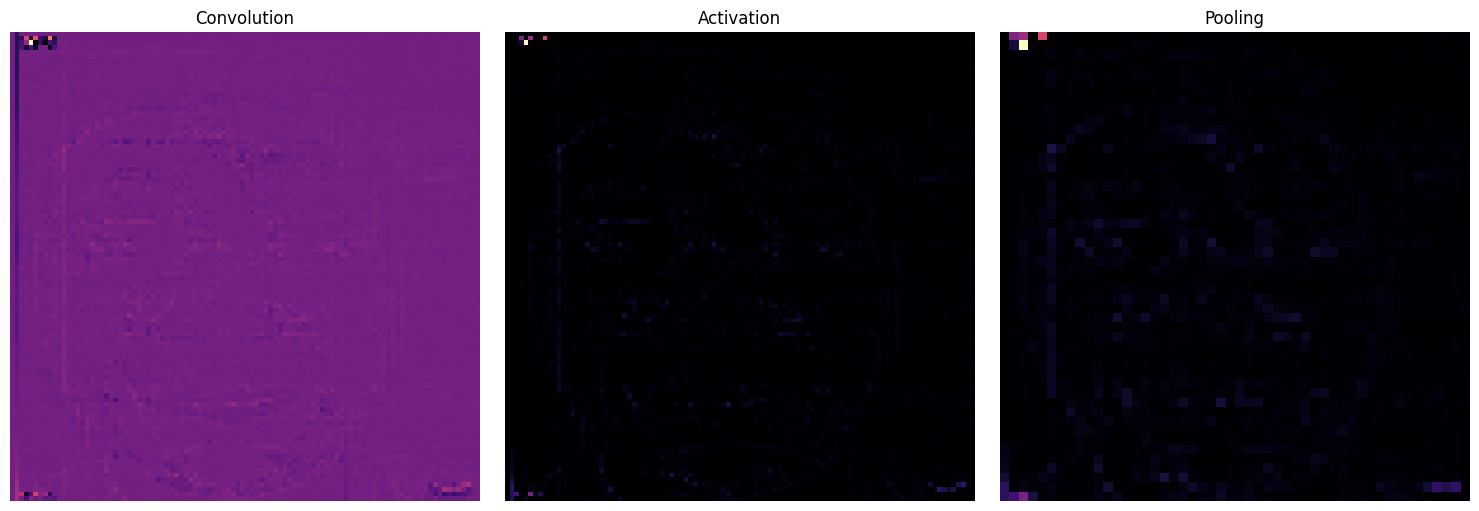

In [48]:
# import the necessary libraries 
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
from itertools import product 

# set the param 
plt.rc('figure', autolayout=True) 
plt.rc('image', cmap='magma') 

# define the kernel 
kernel = tf.constant([[-1, -1, -1], 
					[-1, 8, -1], 
					[-1, -1, -1], 
				]) 

# load the image 
image = tf.io.read_file('D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day1\\PIR-206_14_7.jpg') 
image = tf.io.decode_jpeg(image, channels=1) 
image = tf.image.resize(image, size=[300, 300]) 

# plot the image 
img = tf.squeeze(image).numpy() 
plt.figure(figsize=(5, 5)) 
plt.imshow(img) 
plt.axis('off') 
plt.title('Original Gray Scale image') 
plt.show(); 


# Reformat 
image = tf.image.convert_image_dtype(image, dtype=tf.float32) 
image = tf.expand_dims(image, axis=0) 
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1]) 
kernel = tf.cast(kernel, dtype=tf.float32) 

# convolution layer 
conv_fn = tf.nn.conv2d 

image_filter = conv_fn( 
	input=image, 
	filters=kernel, 
	strides=3, # or (1, 1) 
	padding='SAME', 
) 

plt.figure(figsize=(15, 5)) 

# Plot the convolved image 
plt.subplot(1, 3, 1) 

plt.imshow( 
	tf.squeeze(image_filter) 
) 
plt.axis('off') 
plt.title('Convolution') 

# activation layer 
relu_fn = tf.nn.relu 
# Image detection 
image_detect = relu_fn(image_filter) 

plt.subplot(1, 3, 2) 
plt.imshow( 
	# Reformat for plotting 
	tf.squeeze(image_detect) 
) 

plt.axis('off') 
plt.title('Activation') 

# Pooling layer 
pool = tf.nn.pool 
image_condense = pool(input=image_detect, 
							window_shape=(2, 2), 
							pooling_type='MAX', 
							strides=(2, 2), 
							padding='SAME', 
							) 

plt.subplot(1, 3, 3) 
plt.imshow(tf.squeeze(image_condense)) 
plt.axis('off') 
plt.title('Pooling') 
plt.show() 


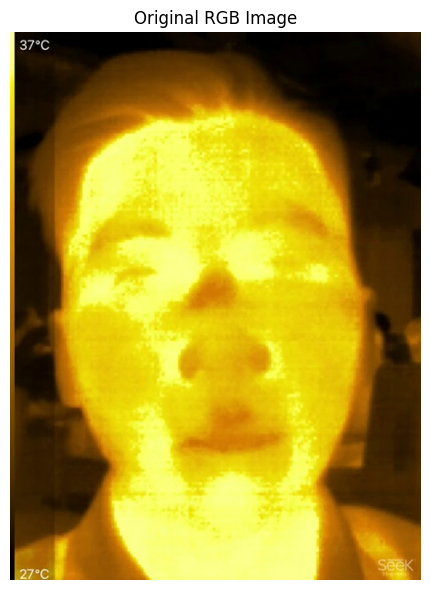

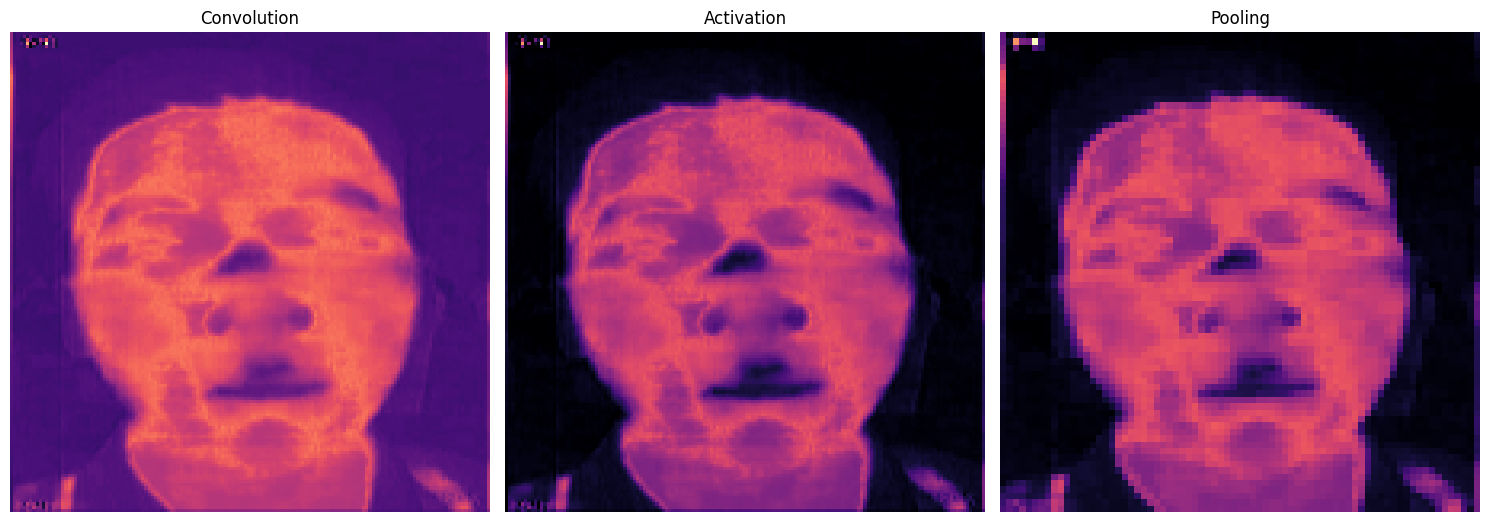

In [58]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Thiết lập các tham số cho đồ họa
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# Define the kernel
kernel = tf.constant([
    [[-1, -1, -1],  # Channel 1
     [-1,  8, -1],
     [-1, -1, -1]],

    [[-1, -1, -1],  # Channel 2
     [-1,  8, -1],
     [-1, -1, -1]],

    [[-1, -1, -1],  # Channel 3
     [-1,  8, -1],
     [-1, -1, -1]],
])

# Load the image (RGB image this time)
image = tf.io.read_file('D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day1\\PIR-206_14_1.jpg')



image = tf.io.decode_jpeg(image, channels=3)  # Specify 3 channels for RGB
# Plot the RGB image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')
plt.title('Thermal Image')
plt.show()

image = tf.image.resize(image, size=[300, 300])



# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
# Reshape kernel để phù hợp với số lượng kênh màu của ảnh (3 kênh)
kernel = tf.reshape(kernel, [*kernel.shape, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# Convolution layer
conv_fn = tf.nn.conv2d
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=2,
    padding='SAME',
)

plt.figure(figsize=(15, 10))

# Plot the convolved image
plt.subplot(1, 3, 1)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Convolution')

# Activation layer
relu_fn = tf.nn.relu
# Image detection
image_detect = relu_fn(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Activation')

# Pooling layer
pool = tf.nn.pool
image_condense = pool(
    input=image_detect,
    window_shape=(2, 2),
    pooling_type='MAX',
    strides=(2, 2),
    padding='SAME',
)

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()
